In [1]:
# importing all the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [2]:
#reading the data
data= pd.read_excel("Powerplant.xlsx")

#Investigating the data
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# As discussed here we are trying to vary the size of training set
train_size = [1, 100, 500, 2000, 5000]
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'
# estimating the training score & validation score
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(), X = data[features],y = data[target], train_sizes = train_size, cv = 5,scoring ='neg_mean_squared_error')

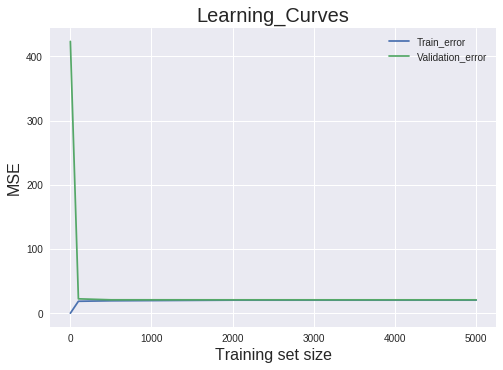

In [4]:
# Generating the Learning_Curve
train_scores_mean = -train_scores.mean(axis = 1) 
validation_scores_mean = -validation_scores.mean(axis = 1)
import matplotlib.pyplot as plt 
plt.style.use('seaborn') 
plt.plot(train_sizes, train_scores_mean, label = 'Train_error') 
plt.plot(train_sizes, validation_scores_mean, label = 'Validation_error') 
plt.ylabel('MSE', fontsize = 16) 
plt.xlabel('Training set size', fontsize = 16) 
plt.title('Learning_Curves', fontsize = 20, y = 1) 
plt.legend()